In [47]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [48]:
if IN_COLAB:
  # Install dependencies
  ! pip install --upgrade pip
  ! pip install czitools

In [49]:
# import the required libraries
from czitools import metadata_tools as czimd
from czitools import read_tools as czird
from czitools import misc_tools
from IPython.display import display, HTML
from pathlib import Path
import os
import dask.array as da
import ipywidgets as widgets

if not IN_COLAB:
    from czitools import napari_tools
    import napari


In [54]:
czifiles = [("CellDivision_T10_Z15_CH2_DCV_small.czi", r"https://github.com/sebi06/czitools/raw/main/data/CellDivision_T10_Z15_CH2_DCV_small.czi"),
            ("CellDivision_T3_Z5_CH2_X240_Y170.czi", r"https://github.com/sebi06/czitools/raw/main/data/CellDivision_T3_Z5_CH2_X240_Y170.czi"),
            ("WP96_4Pos_B4-10_DAPI.czi", r"https://github.com/sebi06/czitools/raw/main/data/WP96_4Pos_B4-10_DAPI.czi"),
            ("w96_A1+A2.czi", r"https://github.com/sebi06/czitools/raw/main/data/w96_A1%2BA2.czi")]

In [55]:
wd = widgets.Select(
    options=czifiles,
    value=r"https://github.com/sebi06/czitools/raw/main/data/CellDivision_T3_Z5_CH2_X240_Y170.czi",
    description='CZI Files:',
    layout={'width': 'max-content'}
)

display(wd)

Select(description='CZI Files:', index=1, layout=Layout(width='max-content'), options=(('CellDivision_T10_Z15_…

In [56]:
selected_file = wd.value

print(f"Selected CZI File {selected_file}")

Selected CZI File https://github.com/sebi06/czitools/raw/main/data/CellDivision_T3_Z5_CH2_X240_Y170.czi


In [58]:
%%capture
# get the complete metadata at once as one big class
mdata = czimd.CziMetadata(selected_file)

# get the CZI metadata dictionary directly from filename
mdict = czimd.create_md_dict_red(mdata, sort=False, remove_none=True)

# convert metadata dictionary to a pandas dataframe
mdframe = misc_tools.md2dataframe(mdict)

2024-02-11 12:26:15,211 -  INFO - FilePath is a valid link. Only pylibCZIrw functionality is available.
2024-02-11 12:26:15,920 -  INFO - Reading Dimensions from CZI image data.
2024-02-11 12:26:16,216 -  INFO - Reading BoundingBoxes from CZI image data.
2024-02-11 12:26:16,217 -  INFO - FilePath is a valid link. Only pylibCZIrw functionality is available.
2024-02-11 12:26:16,530 -  INFO - Reading Channel Information from CZI image data.
2024-02-11 12:26:16,533 -  INFO - Reading Scaling from CZI image data.
2024-02-11 12:26:16,535 -  INFO - Reading Objective Information from CZI image data.
2024-02-11 12:26:16,538 -  INFO - Reading Detector Information from CZI image data.
2024-02-11 12:26:16,540 -  INFO - Reading Microscope Information from CZI image data.
2024-02-11 12:26:16,542 -  INFO - Reading SampleCarrier Information from CZI image data.
2024-02-11 12:26:16,547 -  INFO - Reading Dimensions from CZI image data.
2024-02-11 12:26:16,549 -  INFO - No Scene or Well information found.

In [59]:
# create a ipywdiget to show the dataframe with the metadata
wd = widgets.Output(layout={"scrollY": "auto", "height": "300px"})

with wd:
    display(HTML(mdframe.to_html()))
display(widgets.VBox(children=[wd]))

In [60]:
# return array with dimension order STCZYX(A)
array6d, mdata= czird.read_6darray(selected_file, use_dask=True, chunk_zyx=True)

# show dask array structure
if isinstance(array6d, da.Array):
    print(array6d)
else:
    print("Shape:", array6d.shape, "dtype:", array6d.dtype)


2024-02-11 12:26:23,381 -  INFO - FilePath is a valid link. Only pylibCZIrw functionality is available.
2024-02-11 12:26:24,266 -  INFO - Reading Dimensions from CZI image data.
2024-02-11 12:26:24,603 -  INFO - Reading BoundingBoxes from CZI image data.
2024-02-11 12:26:24,604 -  INFO - FilePath is a valid link. Only pylibCZIrw functionality is available.
2024-02-11 12:26:24,902 -  INFO - Reading Channel Information from CZI image data.
2024-02-11 12:26:24,903 -  INFO - Reading Scaling from CZI image data.
2024-02-11 12:26:24,905 -  INFO - Reading Objective Information from CZI image data.
2024-02-11 12:26:24,906 -  INFO - Reading Detector Information from CZI image data.
2024-02-11 12:26:24,909 -  INFO - Reading Microscope Information from CZI image data.
2024-02-11 12:26:24,910 -  INFO - Reading SampleCarrier Information from CZI image data.
2024-02-11 12:26:24,911 -  INFO - Reading Dimensions from CZI image data.
2024-02-11 12:26:24,911 -  INFO - No Scene or Well information found.

[WinError 123] Die Syntax für den Dateinamen, Verzeichnisnamen oder die Datenträgerbezeichnung ist falsch: 'e:\\Github\\czitools\\demo\\notebooks\\https:\\github.com\\sebi06\\czitools\\raw\\main\\data\\CellDivision_T3_Z5_CH2_X240_Y170.czi'


2024-02-11 12:26:25,985 -  INFO - Reading pixel data via network from link location.


Reading 2D planes: 0 2Dplanes [00:00, ? 2Dplanes/s]

dask.array<rechunk-merge, shape=(1, 3, 2, 5, 170, 240), dtype=uint16, chunksize=(1, 1, 1, 5, 170, 240), chunktype=numpy.ndarray>


In [61]:
if not IN_COLAB:

    # show array inside napari viewer
    viewer = napari.Viewer()
    layers = napari_tools.show(viewer, array6d, mdata,
                               blending="additive",
                               contrast='from_czi',
                               gamma=0.85,
                               show_metadata="table",
                               name_sliders=True)

2024-02-11 12:26:50,563 -  INFO - Adding Channel: LED555
11-Feb-24 12:26:50 - czitools.logger - INFO     - Adding Channel: LED555
2024-02-11 12:26:50,565 -  INFO - Shape Channel: 0 , (1, 3, 1, 5, 170, 240)
11-Feb-24 12:26:50 - czitools.logger - INFO     - Shape Channel: 0 , (1, 3, 1, 5, 170, 240)
2024-02-11 12:26:50,567 -  INFO - Scaling Factors: [1.0, 1.0, 1.0, 3.5195159999999994, 1.0, 1.0]
11-Feb-24 12:26:50 - czitools.logger - INFO     - Scaling Factors: [1.0, 1.0, 1.0, 3.5195159999999994, 1.0, 1.0]
2024-02-11 12:26:50,568 -  INFO - Display Scaling from CZI for CH: 0 Min-Max: 0.0-3921.0
11-Feb-24 12:26:50 - czitools.logger - INFO     - Display Scaling from CZI for CH: 0 Min-Max: 0.0-3921.0
2024-02-11 12:26:53,202 -  INFO - Adding Channel: LED470
11-Feb-24 12:26:53 - czitools.logger - INFO     - Adding Channel: LED470
2024-02-11 12:26:53,205 -  INFO - Shape Channel: 1 , (1, 3, 1, 5, 170, 240)
11-Feb-24 12:26:53 - czitools.logger - INFO     - Shape Channel: 1 , (1, 3, 1, 5, 170, 240)


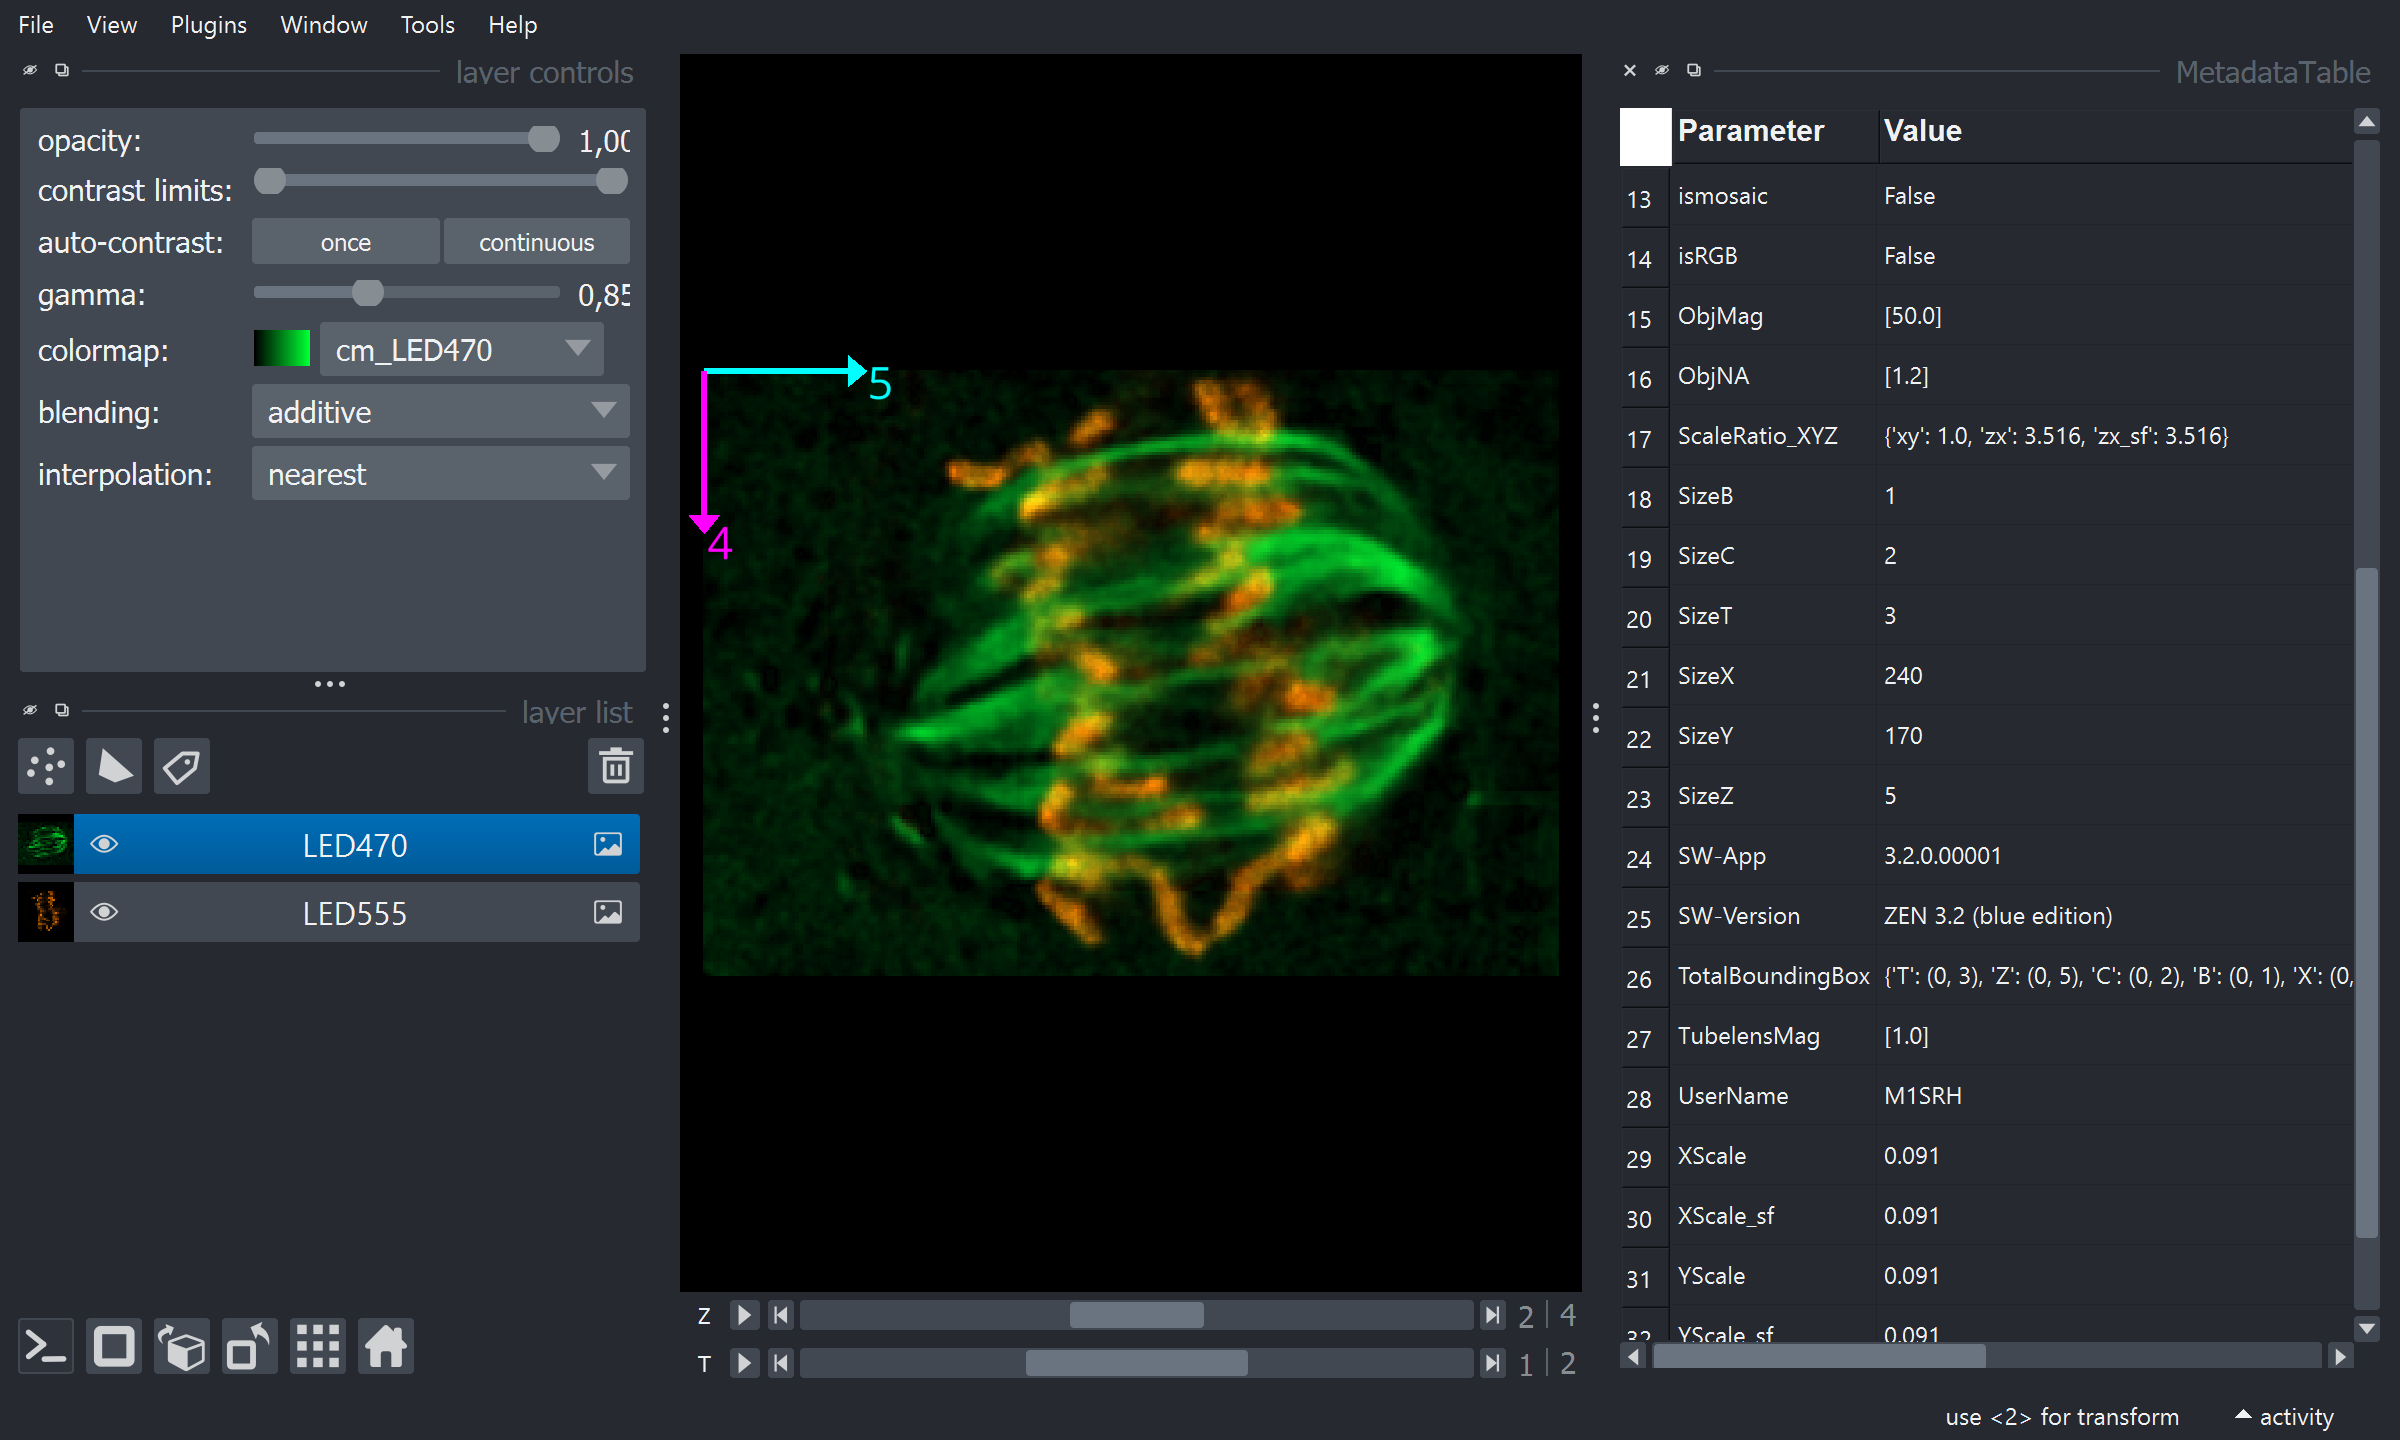

In [62]:
napari.utils.nbscreenshot(viewer)